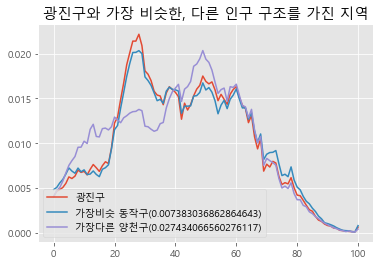

In [52]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('연령별인구현황.csv', 'rt', encoding='UTF8')
data = csv.reader(f)
next(data)
city = {}
for row in data :
    if row[1]=="서울특별시":
        continue
    lis = []
    for k in row[4:]: #연령의 비율 리스트에 추가해줌
        lis.append( int(k.replace(",",""))/int(row[2].replace(",","")) )
    city[row[1].split(" ")[1]] = np.array(lis)  #value로 넘파이 배열
    
f.close()

#변수 초기화
low_city = ""
high_city = ""
low = 1
high = -1

std = city.get("광진구")  #기준이 되는 지역

for key in city.keys():
    if key =="광진구":  #광진구인 경우 생략
        continue
    arr = city.get(key) 
    arr = arr - std  #넘파이 배열을 활용해 한 번에 빼줌
    arr = arr * arr  #넘파이 배열을 활용해 한 번에 제곱
    dev = np.sqrt(arr.sum())  #성분의 합 구하기
    
    if dev < low:  #가장 낮은 값 저장
        low = dev
        low_city = key
    if dev > high:  #가장 높은 값 저장
        high = dev
        high_city = key

#출력
plt.rc('font', family='Malgun Gothic')
plt.title("광진구와 가장 비슷한, 다른 인구 구조를 가진 지역")
plt.style.use(['ggplot'])
plt.plot(std, label = "광진구")
plt.plot(city.get(low_city), label = "가장비슷 "+low_city+"("+str(low)+")")
plt.plot(city.get(high_city), label = "가장다른 "+high_city+"("+str(high)+")")
plt.legend()
plt.show()
